<a href="https://colab.research.google.com/github/nuraimandanial/notebooks/blob/main/Lab%20Work%201%20-%2022004858.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library Import
Import all needed Library from Python


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    learning_curve
)
from sklearn.linear_model import (
    LinearRegression, 
    Lasso,
    Ridge,
)
from sklearn.preprocessing import (
    PolynomialFeatures, 
    StandardScaler, 
    OneHotEncoder,
    MinMaxScaler
)
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import (
    SelectKBest,
    f_regression
)

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# Data Analysis
The 'House Pricing.csv' will be loaded into the notebook and analyzed for the next implementation of variable usage in Machine Learning. From analyzation, the dataset will be explored to gain insights into the data. 

## Import/load dataset into notebook and get the simple description of the data.

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LAB WORK 1/House Pricing.csv')

In [4]:
#Get the first few rows and columns inside the dataset.
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## Data analyzation into graph for the relationship of the features.

In [8]:
columns = data.columns.tolist()

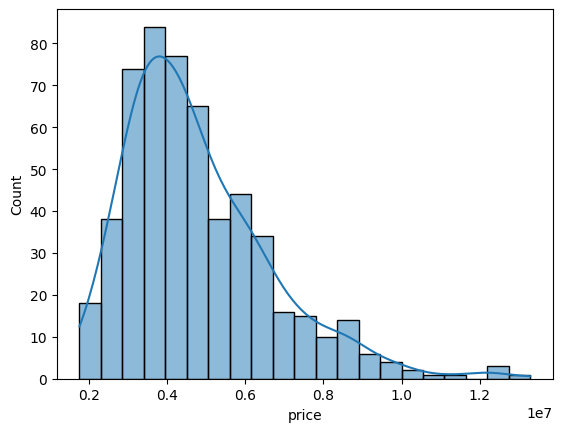


---------------------------------------------------------------------------------------



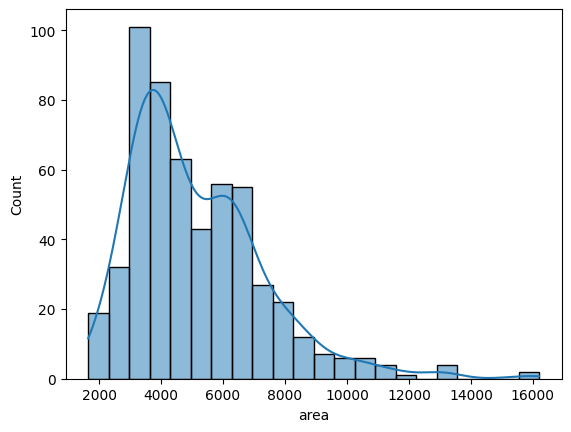


---------------------------------------------------------------------------------------



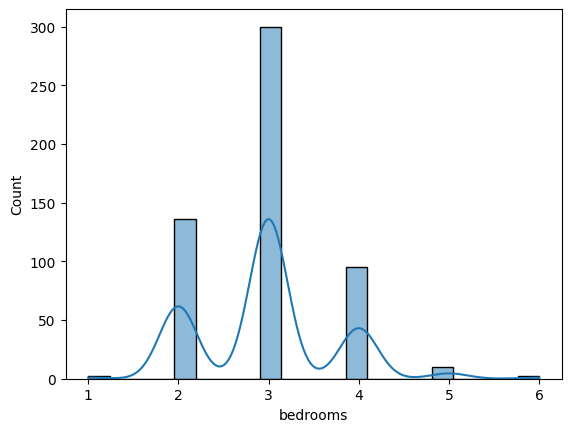

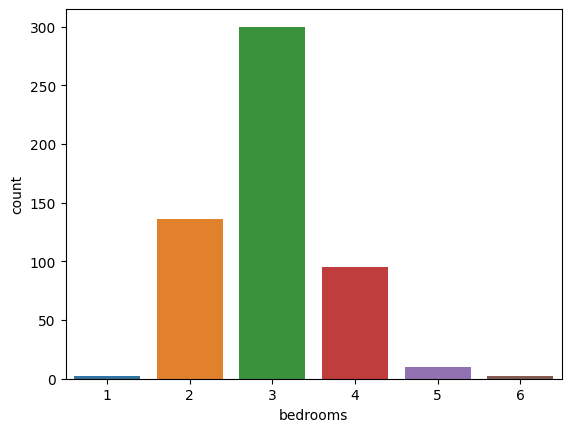


---------------------------------------------------------------------------------------



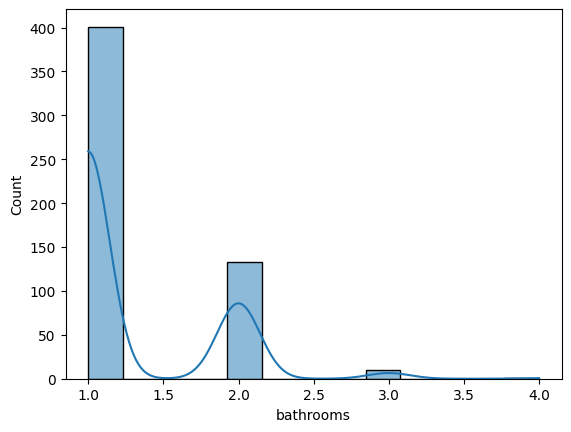

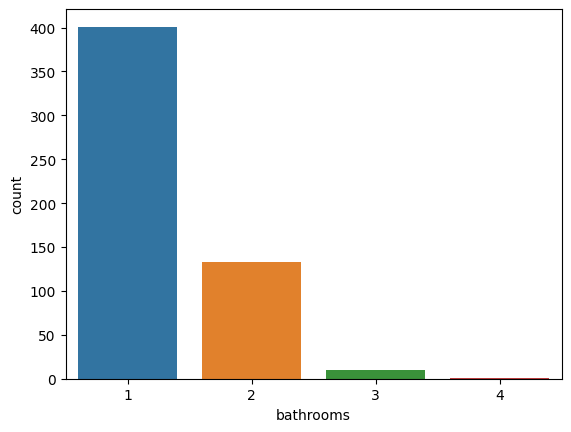


---------------------------------------------------------------------------------------



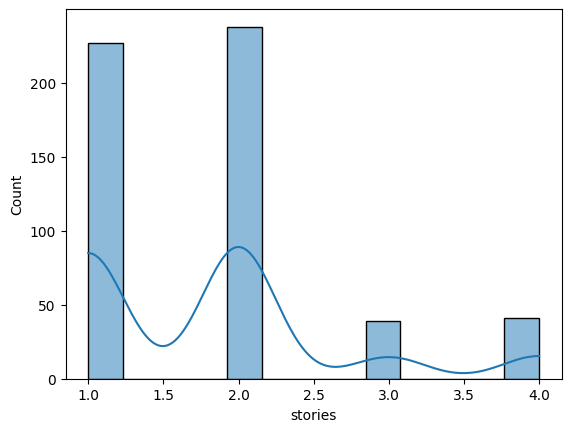

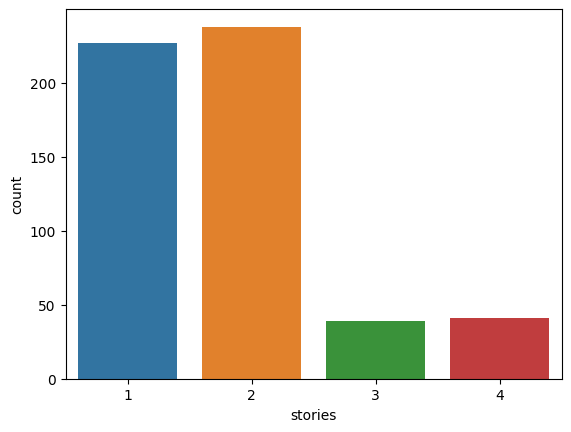


---------------------------------------------------------------------------------------



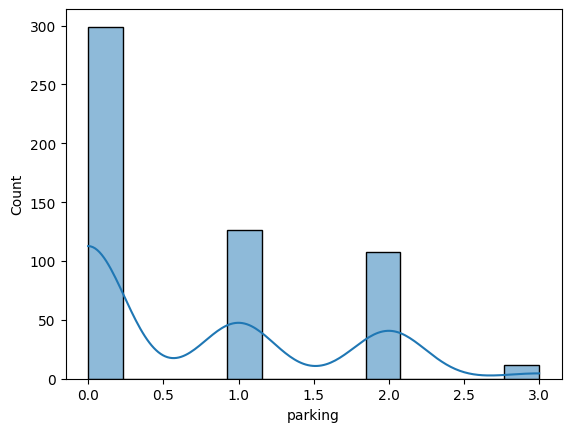

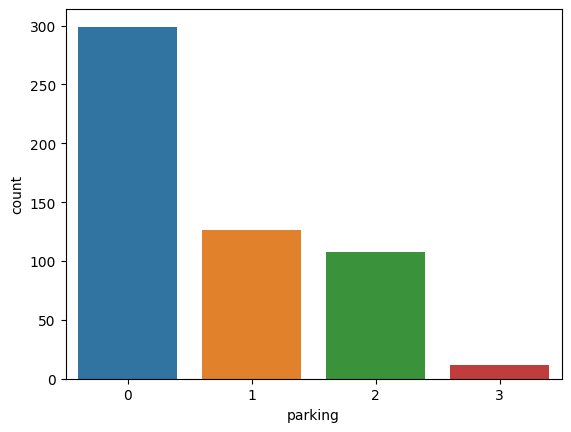


---------------------------------------------------------------------------------------



In [9]:
for column in data.columns:
    if data[column].dtype != 'object':
        sns.histplot(data=data, x=column, kde=True)
        plt.show()
        if len(data[column].unique()) <= 10:
            sns.countplot(data=data, x=column)
            plt.show()
        print('\n---------------------------------------------------------------------------------------\n')

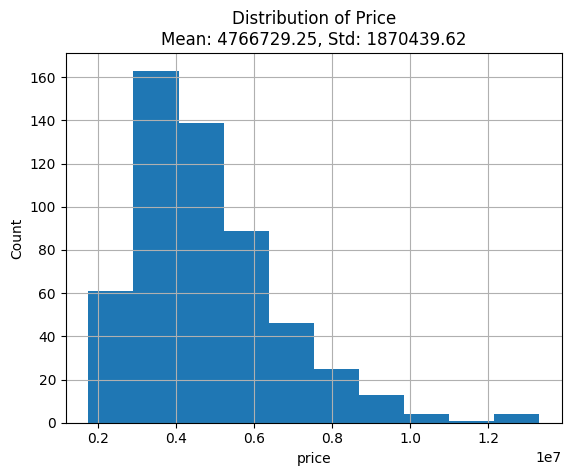

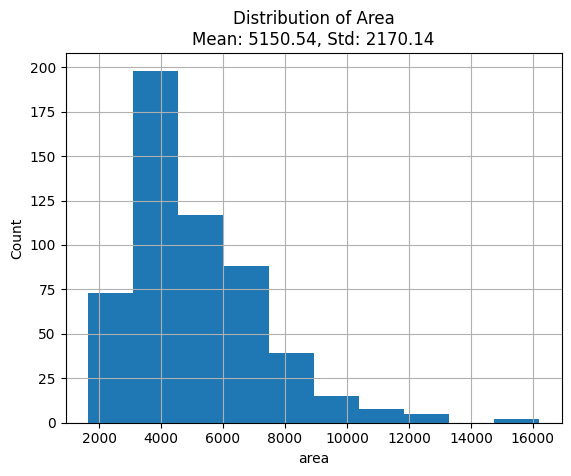

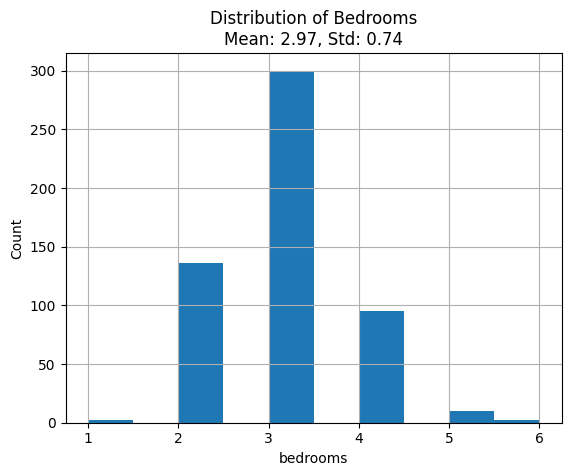

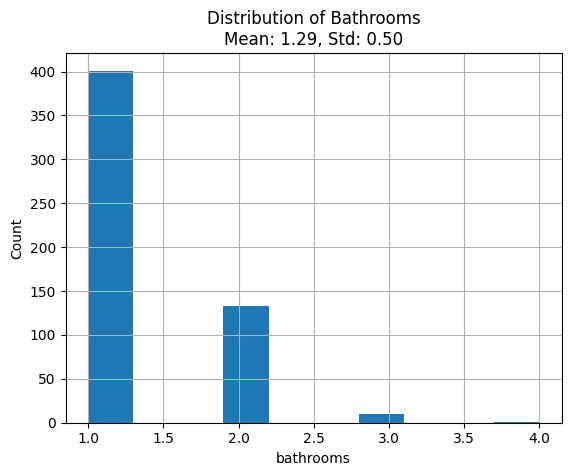

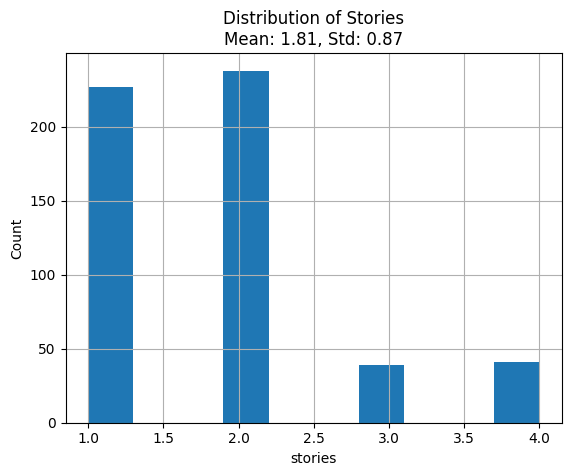

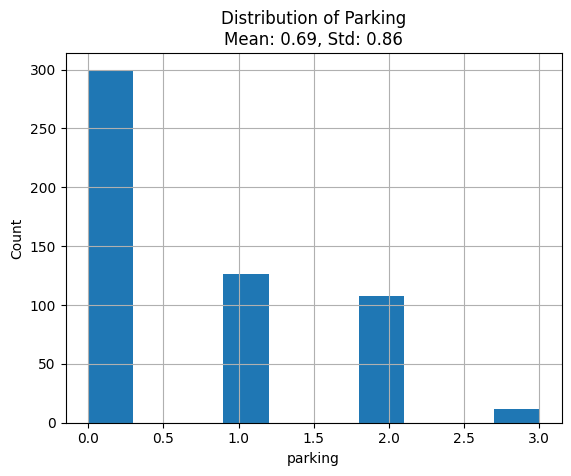

In [10]:
#Data statistics summary from 'data.describe()'
for column in data.columns:
  if data[column].dtype != 'object':
    plt.figure()
    data[column].hist()
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title('Distribution of {}\nMean: {:.2f}, Std: {:.2f}'.format(column.capitalize(), data[column].mean(), data[column].std()))
    plt.show()

In [11]:
noPrice = columns.copy()
noPrice.remove('price')

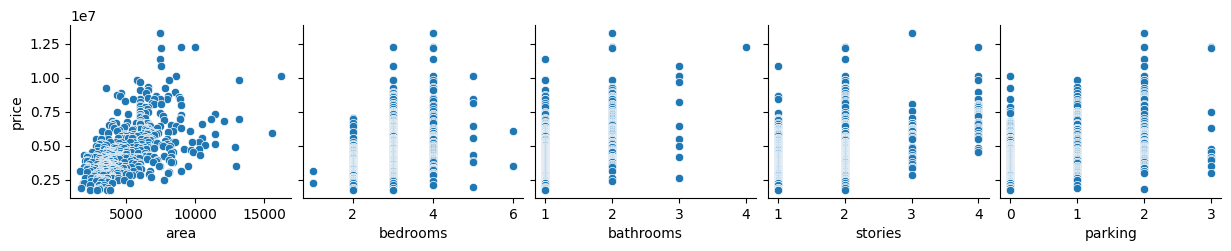

In [12]:
numerical = []
for column in noPrice:
  if data[column].dtype != 'O':
    numerical.append(column)

sns.pairplot(data=data, x_vars=numerical, y_vars='price')
plt.show()

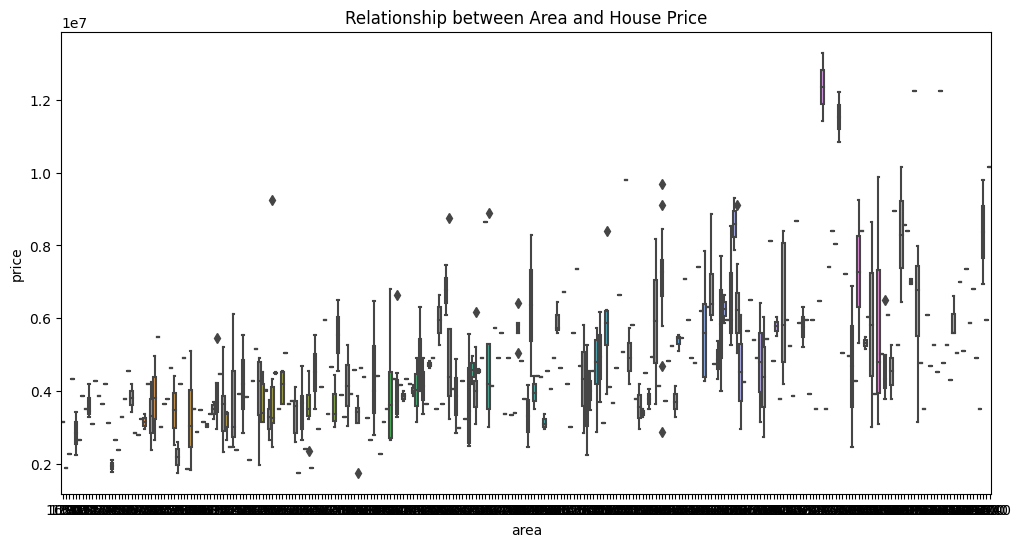

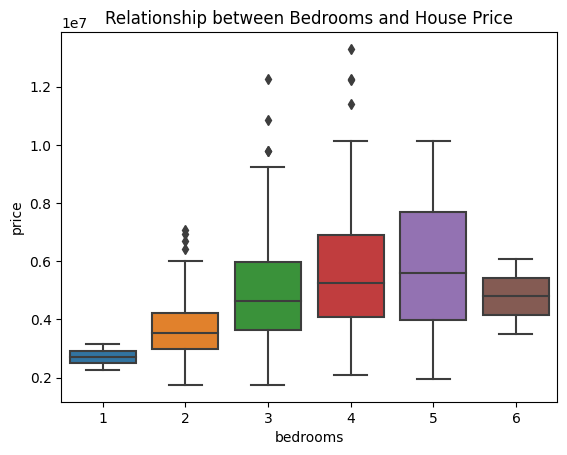

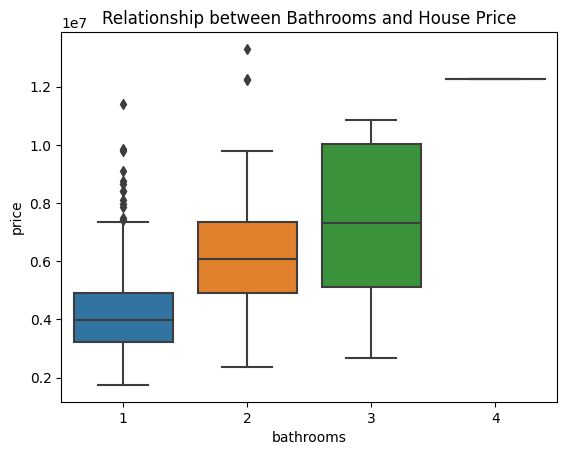

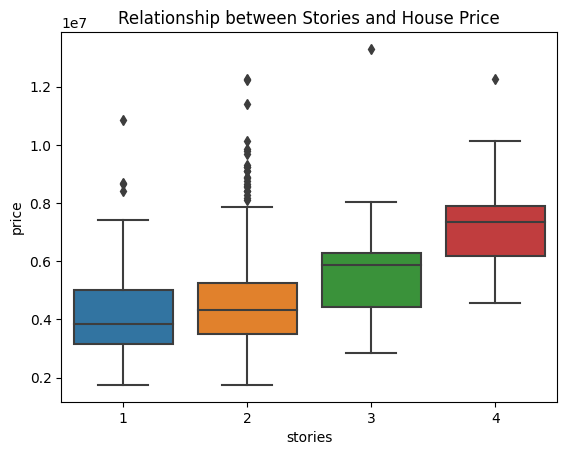

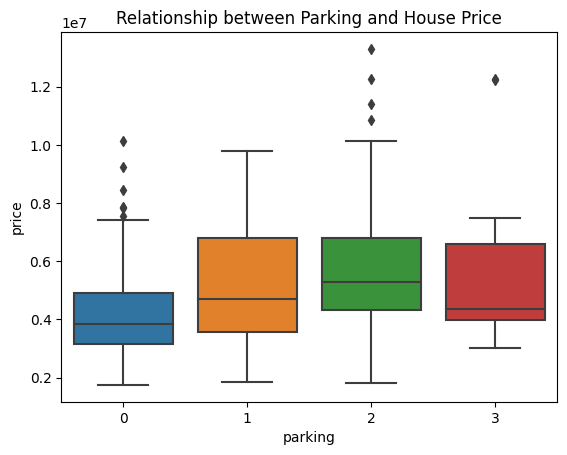

In [13]:
categorical = []
plt.figure(figsize=(12,6))
for column in noPrice:
  if data[column].dtype != 'object':
    categorical.append(column)
    sns.boxplot(data=data, x=column, y='price')
    plt.title('Relationship between ' + column.capitalize() + ' and House Price')
    plt.show()

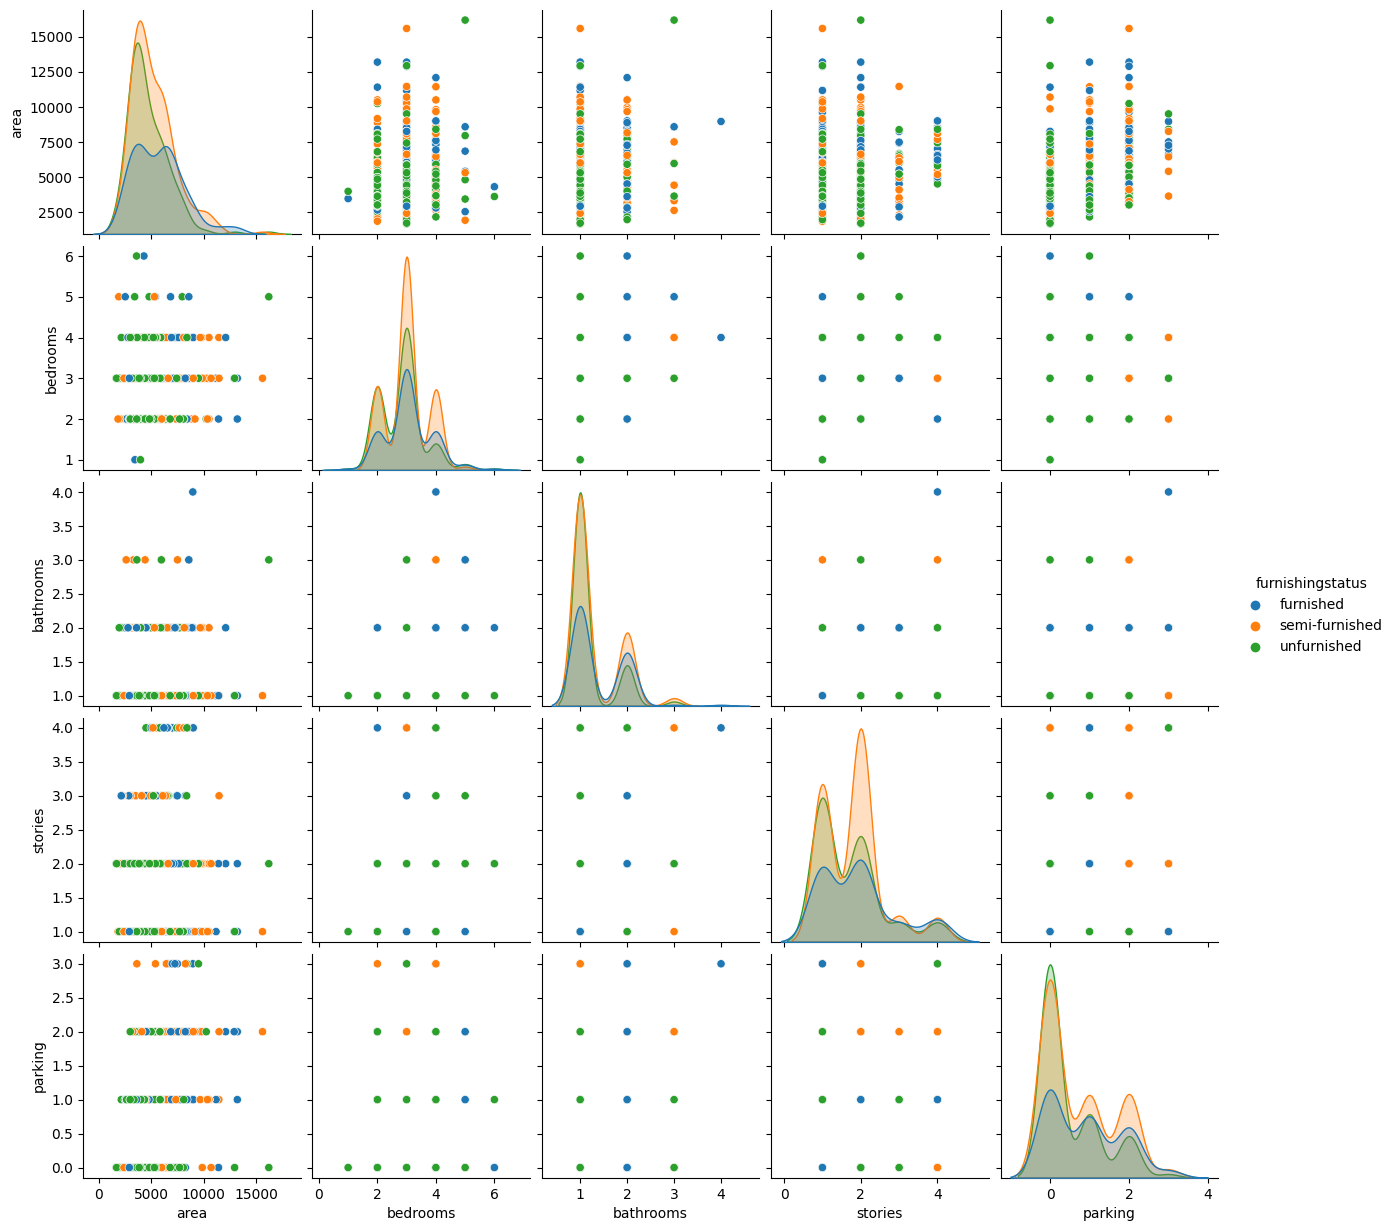

In [14]:
sns.pairplot(data=data, vars=categorical, hue='furnishingstatus')
plt.show()

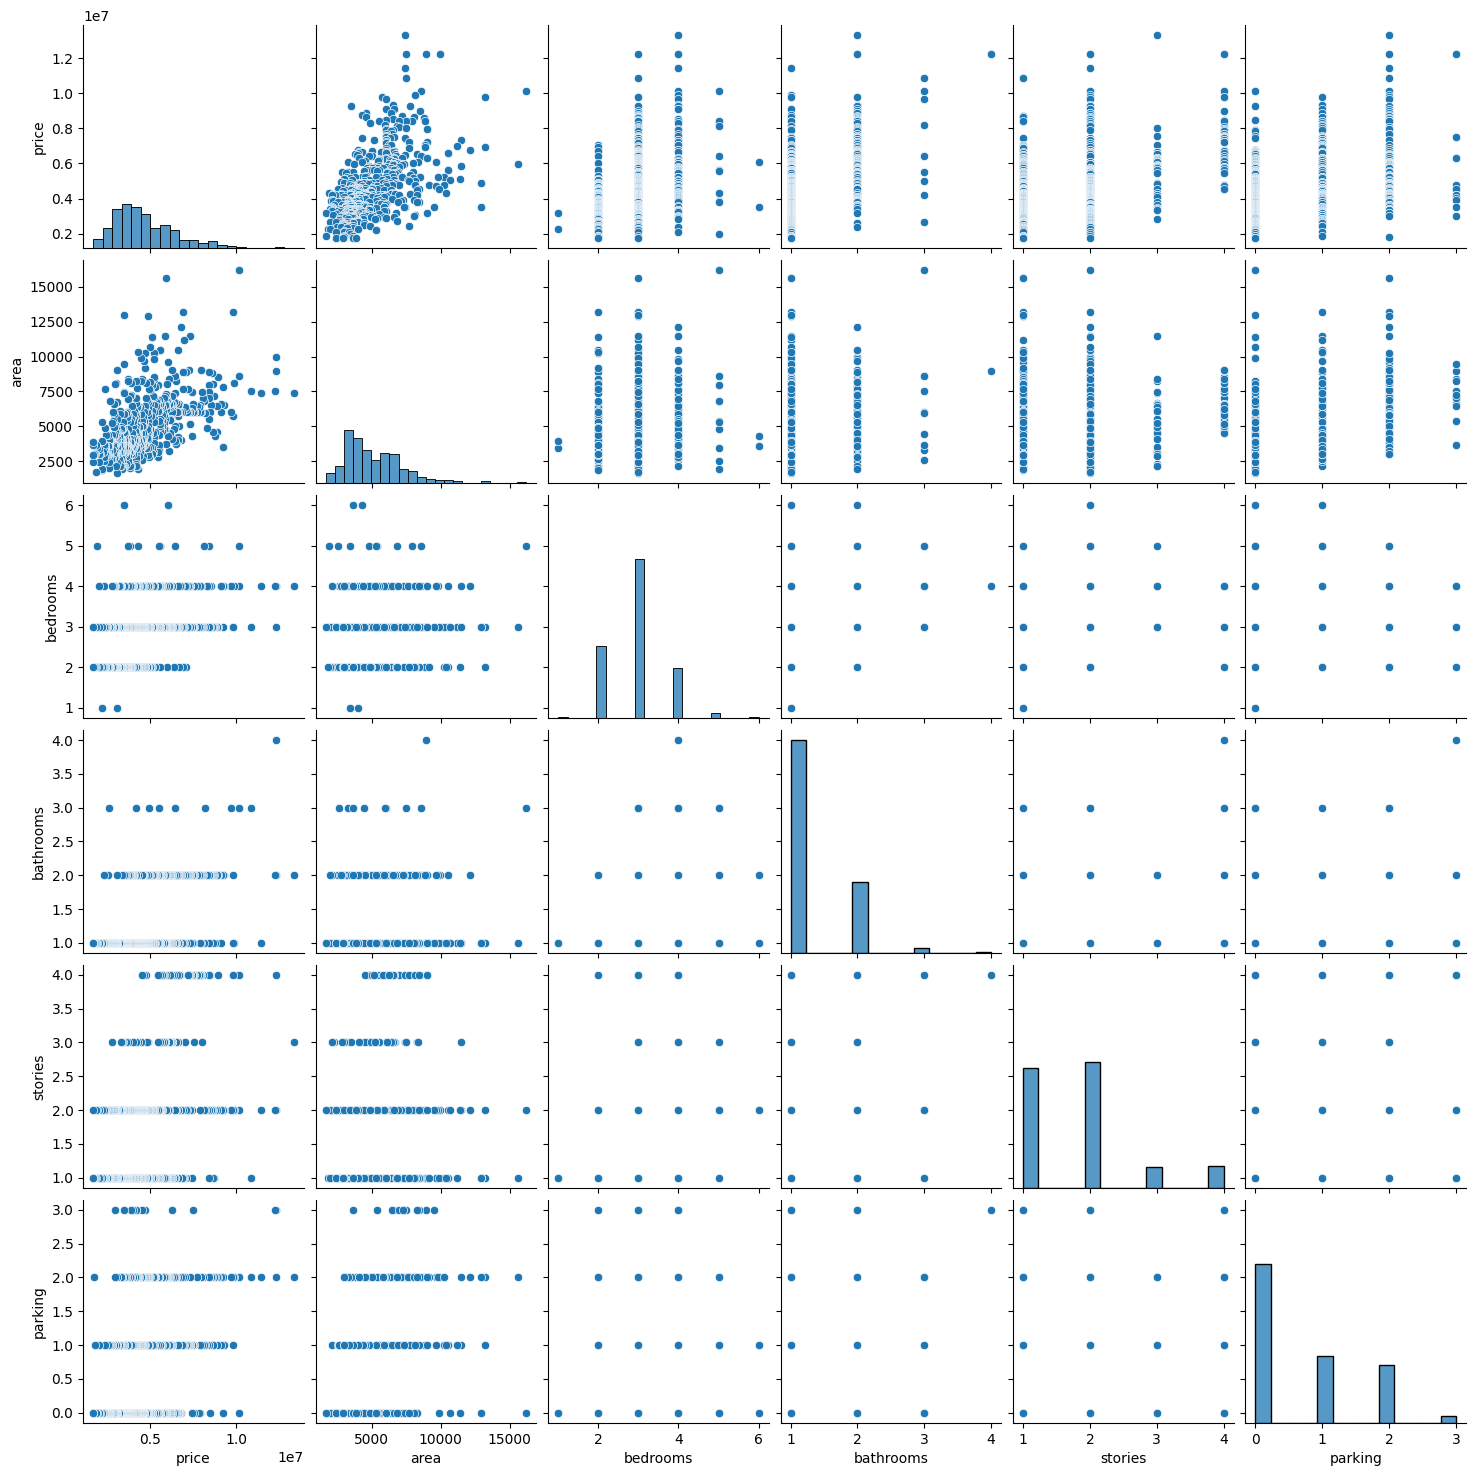

In [15]:
sns.pairplot(data)
plt.show()

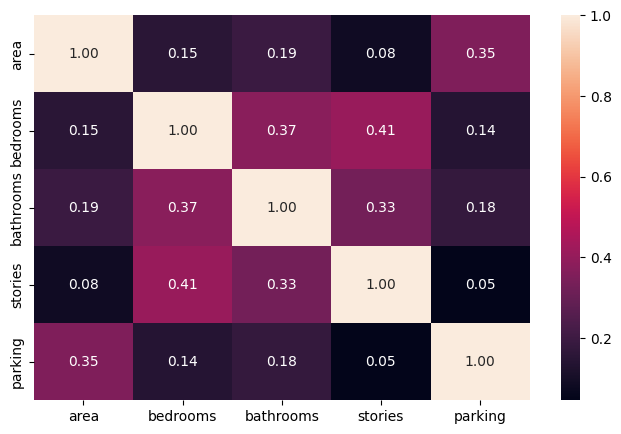

In [16]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(data[numerical].corr(), annot=True, fmt='.2f', ax=ax)
plt.show()

# Data Preprocessing
Perform data preprocessing tasks such as handling missing values, handling categorical variables, and scaling/normalizing the numerical features.

In [17]:
numerical_new = numerical.copy()
numerical_new.append('price')
non_numerical = [col for col in columns if col not in numerical_new]
non_numerical.remove('guestroom')

data_processed = pd.get_dummies(data.copy().drop('guestroom', axis=1), columns=non_numerical)

In [18]:
scaler = StandardScaler()
data_processed[numerical] = scaler.fit_transform(data_processed[numerical])

In [19]:
X = data_processed.drop('price', axis=1)
y = data_processed['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

In [20]:
X_new = data.drop('price', axis=1)
y_new = data['price']

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.25, random_state=50)

In [21]:
categorical = [col for col in columns if col not in numerical]
categorical.remove('price')

numerical_pipe = Pipeline(steps=[
    ('scale', StandardScaler())
])
categorical_pipe = Pipeline(steps=[
    ('encode', OneHotEncoder(drop='first')),
    ('scale', StandardScaler(with_mean=False)),
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipe, numerical),
    ('cat', categorical_pipe, categorical),
], remainder='drop')

# Regression Model Development
Implement a regression model to predict house prices based on the features. Train the regression model using the training dataset and evaluate the model with testing data using appropriate evaluation metrics.

## Cross Validation for Optimum Number of Features

In [22]:
r2scores = []
adjr2 = []
features = []

for i in range(1, 9):
  reduce_dim_pipe = Pipeline(steps=[
      ('preprocess', preprocessor),
      ('reduce_dim', SelectKBest(k=i, score_func=f_regression)),
  ])

  pipeline = Pipeline(steps=[
      ('reduce_dim_pipe', reduce_dim_pipe),
      ('regress', LinearRegression())
  ])

  pipeline.fit(X_train_new, y_train_new)
  r2 = r2_score(y_test_new, pipeline.predict(X_test_new)) #cross_val_score(pipeline, X_train_new, y_train_new, scoring='r2').mean()
  r2scores.append((r2))

  n = len(X_train_new)
  p = i
  adj_r2 = 1 - ((1-r2) * (n-1)) / (n-p-1)
  adjr2.append((adj_r2))

  reduce_dim_pipe.fit(X_train_new, y_train_new)
  column = reduce_dim_pipe.named_steps['reduce_dim'].get_support(indices=True)
  data_new_features = X_train_new.iloc[:, column]
  best_features = list(data_new_features.columns)
  features.append(best_features)

best_index = np.argmax(adjr2) + 1

In [23]:
score_data = pd.DataFrame(np.column_stack((r2scores, adjr2)), columns=['R2', 'Adj R2'])
score_data['Feature Names'] = features
score_data['Features'] = range(1,9)
score_data.applymap(lambda x: '%.2f' % x if isinstance(x, (float)) else x)

,R2,Adj R2,Feature Names,Features
0,0.34,0.34,[area],1
1,0.57,0.57,"[area, bathrooms]",2
2,0.61,0.60,"[area, bathrooms, stories]",3
3,0.67,0.66,"[area, bathrooms, stories, parking]",4
4,0.68,0.67,"[area, bedrooms, bathrooms, stories, parking]",5
5,0.69,0.68,"[area, bedrooms, bathrooms, stories, mainroad,...",6
6,0.72,0.72,"[area, bedrooms, bathrooms, stories, mainroad,...",7
7,0.72,0.71,"[area, bedrooms, bathrooms, stories, mainroad,...",8


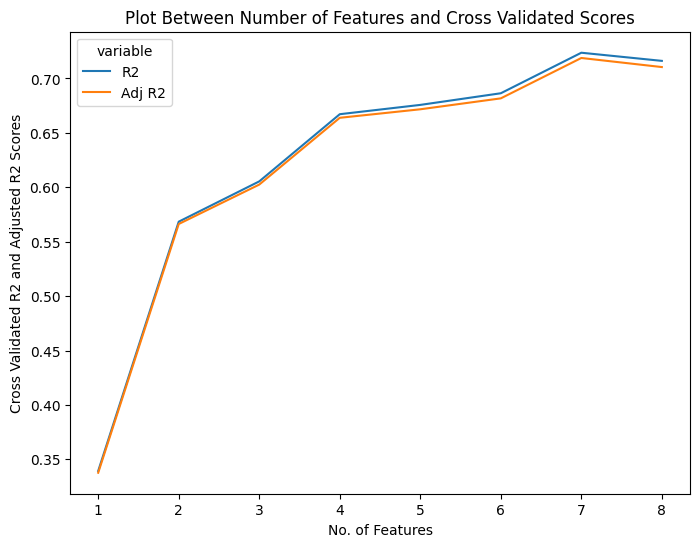

In [24]:
fig, ax = plt.subplots(figsize=(8,6))

long_format_data = pd.melt(score_data.loc[:, ['Features','R2','Adj R2']], ['Features'])
sns.lineplot(x='Features', y='value', hue='variable', data=long_format_data, ax=ax)

ax.set_xlabel('No. of Features')
ax.set_ylabel('Cross Validated R2 and Adjusted R2 Scores')
ax.set_title('Plot Between Number of Features and Cross Validated Scores')
plt.show()

From above line plot and table, using 7 features gives the highest R-Squared value compared to others. Therefore, all features except 'guestroom' will be used. 

## Linear Regression

In [25]:
linear = LinearRegression()
linear.fit(X_train, y_train)

y_pred_lr = linear.predict(X_test)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)
adj_r2 = 1 - (1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)

print('Linear Regression :')
print('Mean Squared Error: {:.2f}'.format(mse))
print('Root Mean Squared Error: {:.2f}'.format(rmse))
print('R-squared: {:.2f}'.format(r2))
print("Adjusted R-squared: {:.2f}".format(adj_r2))

Linear Regression :
Mean Squared Error: 878182883054.15
Root Mean Squared Error: 937114.12
R-squared: 0.74
Adjusted R-squared: 0.70


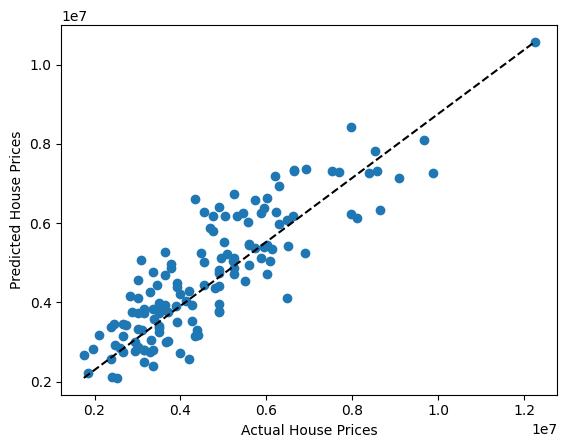

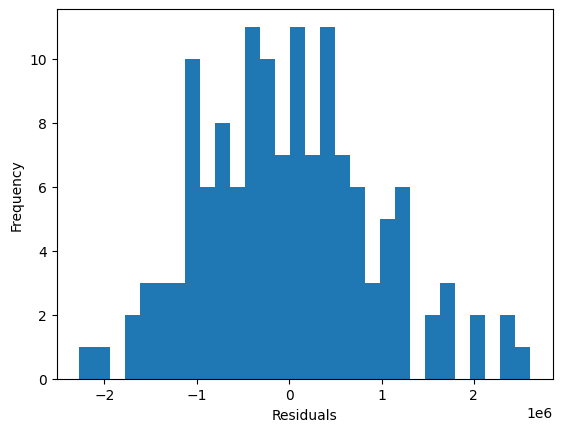

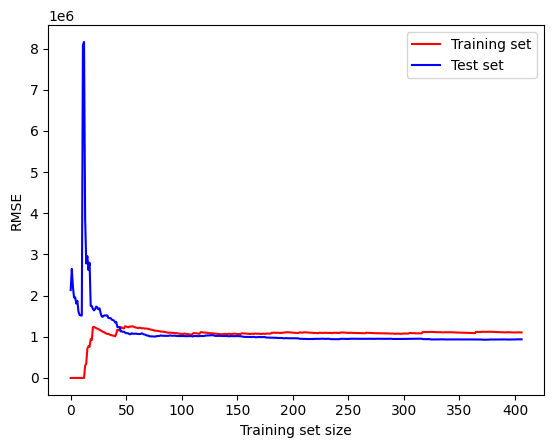

In [26]:
# Visualize the predicted vs. actual house prices using a scatter plot
plt.scatter(y_test, y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_pred_lr.min(), y_pred_lr.max()], 'k--')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.show()

# Visualize the residuals using a histogram
residuals = y_test - y_pred_lr
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Visualize the learning curve using a line plot
train_errors, test_errors = [], []
for m in range(1, len(X_train)):
    linear.fit(X_train[:m], y_train[:m])
    y_train_pred = linear.predict(X_train[:m])
    y_test_pred = linear.predict(X_test)
    train_errors.append(mean_squared_error(y_train[:m], y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))
plt.plot(np.sqrt(train_errors), 'r-', label='Training set')
plt.plot(np.sqrt(test_errors), 'b-', label='Test set')
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.legend()
plt.show()

### Best Features for Linear Regression

In [27]:
preprocess_best = ColumnTransformer(transformers=[
    ('num', numerical_pipe, numerical),
    ('cat', categorical_pipe, non_numerical),
], remainder='drop')

best_pipe = Pipeline(steps=[
    ('preprocess', preprocess_best),
    ('reduce_dim', SelectKBest(k=best_index, score_func=f_regression)),
])

linear_best = Pipeline(steps=[
    ('reduce_dim_pipe', best_pipe),
    ('regress', LinearRegression())
])

linear_best.fit(X_train_new, y_train_new)

y_pred_lr_best = linear_best.predict(X_test_new)
mse = mean_squared_error(y_test_new, y_pred_lr_best)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_new, y_pred_lr_best)
n = len(X_train_new)
p = best_index
adj_r2 = 1 - ((1-r2) * (n-1)) / (n-p-1)
# adj_r2 = 1 - (1-r2)*(X_test_new.shape[0]-1)/(X_test_new.shape[0]-X_test_new.shape[1]-1)

print('Linear Regression Best Features :')
print('Mean Squared Error: {:.2f}'.format(mse))
print('Root Mean Squared Error: {:.2f}'.format(rmse))
print('R-squared: {:.2f}'.format(r2))
print("Adjusted R-squared: {:.2f}".format(adj_r2))

Linear Regression Best Features :
Mean Squared Error: 944310158308.67
Root Mean Squared Error: 971756.22
R-squared: 0.72
Adjusted R-squared: 0.72


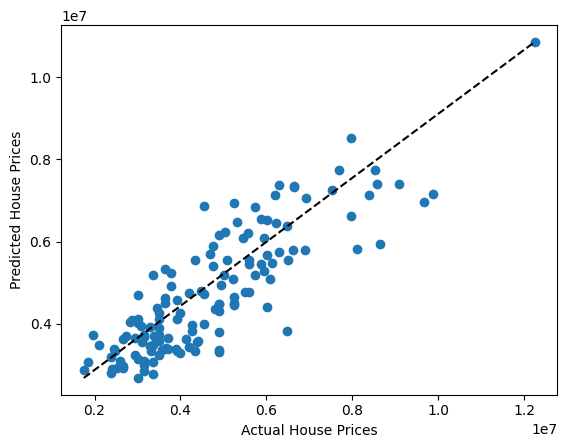

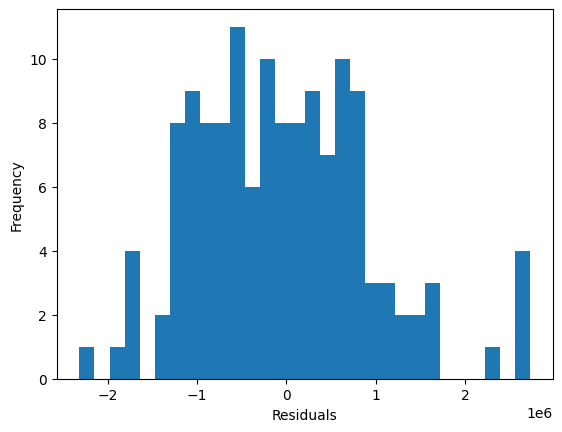

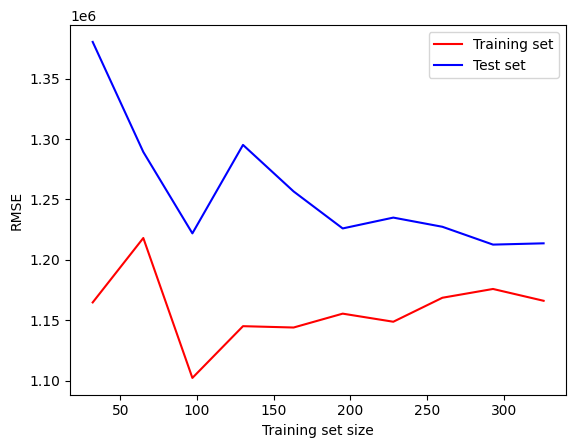

In [28]:
# Visualize the predicted vs. actual house prices using a scatter plot
plt.scatter(y_test_new, y_pred_lr_best)
plt.plot([y_test_new.min(), y_test_new.max()], [y_pred_lr_best.min(), y_pred_lr_best.max()], 'k--')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.show()

# Visualize the residuals using a histogram
residuals = y_test_new - y_pred_lr_best
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Visualize the learning curve using a line plot
train_sizes, train_scores, test_scores = learning_curve(
    estimator=linear_best,
    X=X_train_new,
    y=y_train_new,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_mean_squared_error'
)
train_errors = np.mean(-train_scores, axis=1)
test_errors = np.mean(-test_scores, axis=1)

plt.plot(train_sizes, np.sqrt(train_errors), 'r-', label='Training set')
plt.plot(train_sizes, np.sqrt(test_errors), 'b-', label='Test set')
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.legend()
plt.show()

## Polynomial Regression

In [29]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_linear = LinearRegression()
poly_linear.fit(X_train_poly, y_train)

y_pred_poly = poly_linear.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred_poly)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_poly)
n = X_test_poly.shape[0] # number of samples
p = X_test_poly.shape[1] # number of features
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
adj_r2_old = 1 - (1-r2)*(X_test_poly.shape[0]-1)/(X_test_poly.shape[0]-X_test_poly.shape[1]-1)

print('Polynomial Regression :')
print('Mean Squared Error: {:.2f}'.format(mse))
print('Root Mean Squared Error: {:.2f}'.format(rmse))
print('R-squared: {:.2f}'.format(r2))
print("Adjusted R-squared: {:.2f}".format(adj_r2))
print("Adjusted R-squared: {:.2f}".format(adj_r2_old))

Polynomial Regression :
Mean Squared Error: 1244714008601.81
Root Mean Squared Error: 1115667.52
R-squared: 0.64
Adjusted R-squared: 1.92
Adjusted R-squared: 1.92


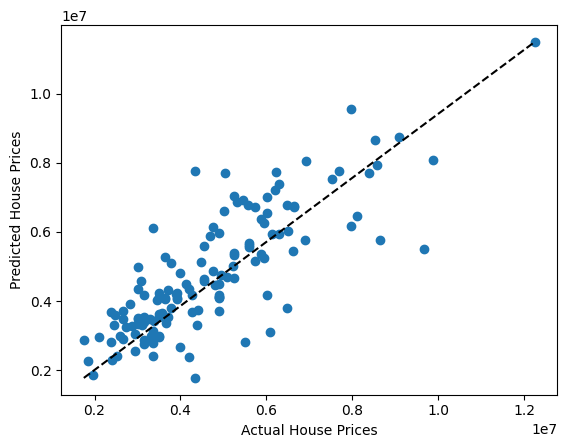

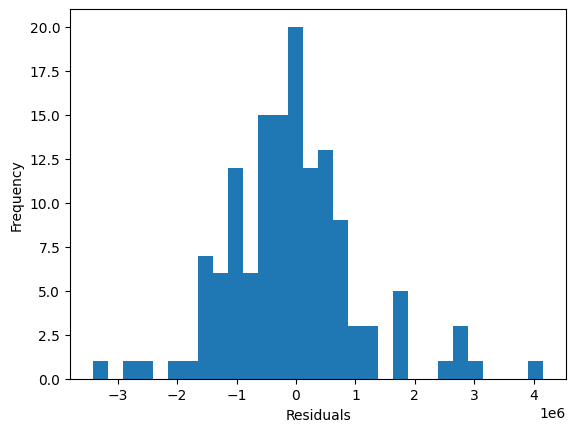

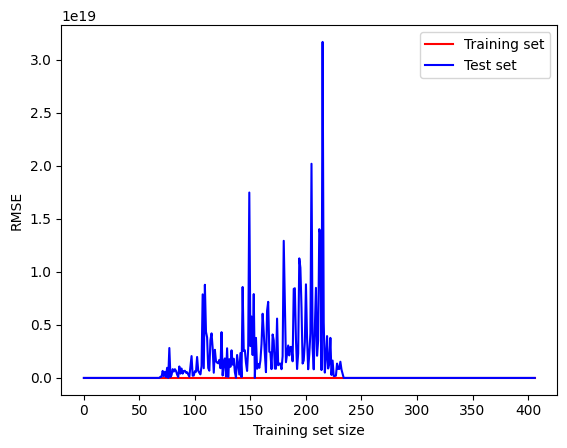

In [30]:
import matplotlib.pyplot as plt

# Visualize the predicted vs. actual house prices using a scatter plot
plt.scatter(y_test, y_pred_poly)
plt.plot([y_test.min(), y_test.max()], [y_pred_poly.min(), y_pred_poly.max()], 'k--')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.show()

# Visualize the residuals using a histogram
residuals = y_test - y_pred_poly
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Visualize the learning curve using a line plot
train_errors, test_errors = [], []
for m in range(1, len(X_train_poly)):
    poly_linear.fit(X_train_poly[:m], y_train[:m])
    y_train_pred = poly_linear.predict(X_train_poly[:m])
    y_test_pred = poly_linear.predict(X_test_poly)
    train_errors.append(mean_squared_error(y_train[:m], y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))
plt.plot(np.sqrt(train_errors), 'r-', label='Training set')
plt.plot(np.sqrt(test_errors), 'b-', label='Test set')
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.legend()
plt.show()

### Best Features for Polynomial Regression

In [31]:
preprocess_best = ColumnTransformer(transformers=[
    ('num', numerical_pipe, numerical),
    ('cat', categorical_pipe, non_numerical),
], remainder='drop')

best_pipe = Pipeline(steps=[
    ('preprocess', preprocess_best),
    ('reduce_dim', SelectKBest(k=best_index, score_func=f_regression)),
])

poly_best = Pipeline(steps=[
    ('reduce_dim_pipe', best_pipe),
    ('poly', PolynomialFeatures(degree=2)),
    ('regress', Ridge())
])

poly_best.fit(X_train_new, y_train_new)

y_pred_poly = poly_best.predict(X_test_new)
mse = mean_squared_error(y_test_new, y_pred_poly)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_new, y_pred_poly)
adj_r2 = 1 - (1-r2)*(X_test_new.shape[0]-1)/(X_test_new.shape[0]-X_test_new.shape[1]-1)

print('Polynomial Regression :')
print('Mean Squared Error: {:.2f}'.format(mse))
print('Root Mean Squared Error: {:.2f}'.format(rmse))
print('R-squared: {:.2f}'.format(r2))
print("Adjusted R-squared: {:.2f}".format(adj_r2))

Polynomial Regression :
Mean Squared Error: 1019437277615.60
Root Mean Squared Error: 1009671.87
R-squared: 0.70
Adjusted R-squared: 0.67


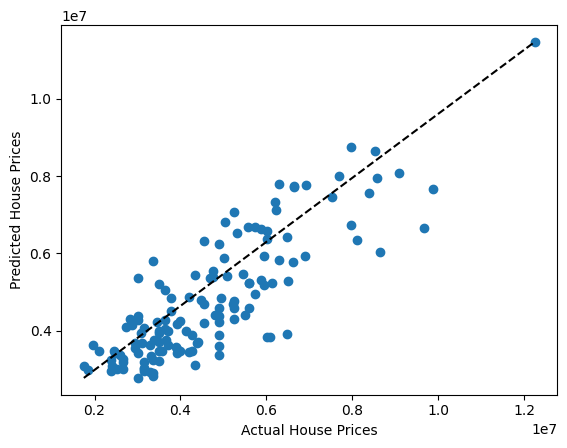

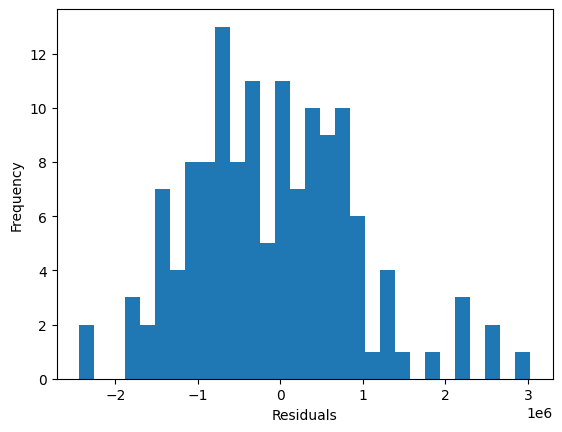

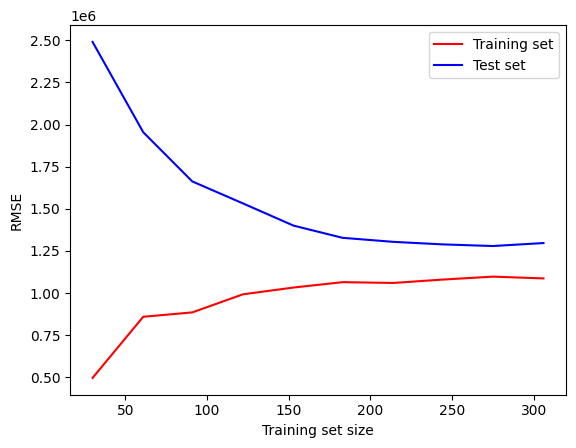

In [32]:
# Visualize the predicted vs. actual house prices using a scatter plot
plt.scatter(y_test_new, y_pred_poly)
plt.plot([y_test_new.min(), y_test_new.max()], [y_pred_poly.min(), y_pred_poly.max()], 'k--')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.show()

# Visualize the residuals using a histogram
residuals = y_test_new - y_pred_poly
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Visualize the learning curve using a line plot
train_sizes, train_scores, test_scores = learning_curve(
    estimator=poly_best,
    X=X_train_new,
    y=y_train_new,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=4,
    scoring='neg_mean_squared_error'
)
train_errors = np.mean(-train_scores, axis=1)
test_errors = np.mean(-test_scores, axis=1)

plt.plot(train_sizes, np.sqrt(train_errors), 'r-', label='Training set')
plt.plot(train_sizes, np.sqrt(test_errors), 'b-', label='Test set')
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.legend()
plt.show()